# 911 Calls Exploratory Analysis

## Data and Set Up

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Read data
df = pd.read_csv('data.csv')
# Check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [3]:
# Check head
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [4]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships(twp) for 911 calls?**

In [5]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** How many unique title codes are there?**

In [6]:
df['title'].nunique()

110

## Creating New Features

** In the title column there are 'Reasons/Departments' specified before the title code.  These are EMS, Fire, and Traffic.   
Use .apply() with a custom lambda expression to create a new column called 'Reason' that contains this string value.**

In [7]:
a = df['title'].apply(lambda x:x.split(':')[0])
df.insert(4,'Reasons',a)

In [8]:
df.head()

,lat,lng,desc,zip,Reasons,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** What is the most common reason for a 911 call based off this new column?**

In [9]:
df['Reasons'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

** Use seaborn to create a countplot of 911 calls by Reason**

In [10]:
import seaborn as sns


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reasons', ylabel='count'>

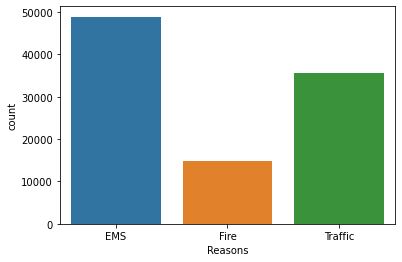

In [11]:
sns.countplot(df['Reasons'])

** What is the data type of the objects in the timeStamp column?**

In [12]:
df.timeStamp.describe()

count                   99492
unique                  72577
top       2015-12-10 17:40:01
freq                        8
Name: timeStamp, dtype: object

In [13]:
df.timeStamp.dtypes

dtype('O')

In [14]:
type(df['timeStamp'][0])

str

** Convert timeStamp from strings to DateTime object**

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week.  
Create these columns based off of the timeStamp column.**

In [16]:
time = df['timeStamp'].iloc[0]
print(time.hour)
print(time.month)
print(time.dayofweek)

17
12
3


In [17]:
# Create hour column
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [18]:
# Create month column
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

In [19]:
# Create day of week
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [28]:
df['length'] = df['Name'].apply(lambda x: len(x)) 

In [29]:
# Confirm columns were added to dataframe or not?
df.head()

,lat,lng,desc,zip,Reasons,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,New
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thu,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thu,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thu,4
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thu,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thu,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with a dictionary to map the actual string names to the day of the week** like this: {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [22]:
df.head(3)

,lat,lng,desc,zip,Reasons,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thu


** Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column **

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day of Week', ylabel='count'>

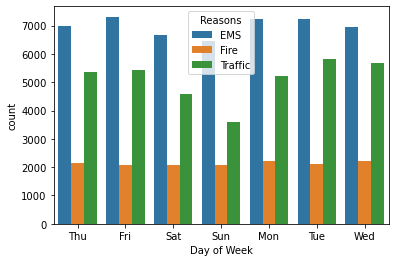

In [23]:
# Create count plot
sns.countplot(df['Day of Week'],hue=df['Reasons'])

**Use seaborn to create a countplot of the Month column with the hue based off the Reason column**

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

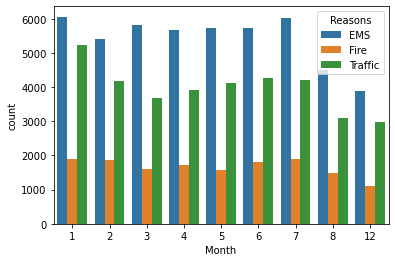

In [24]:
sns.countplot(df['Month'],hue=df['Reasons'])

** Do you notice something strange about this Plot? **    
Plot is missing some months.  May need to plot this information another way, possibly a simple line plot, that fills in the missing data.

** Create a groupby object called byMonth that groups the DataFrame by month and uses the count() method for aggregation. **

In [25]:
a = df.groupby('Month').count()
a

,lat,lng,desc,zip,Reasons,title,timeStamp,twp,addr,e,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11423,11420,11378,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11786,11777,11732,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12137,12133,12088,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9078,9073,9025,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7969,7963,7916,7969,7969,7969


**Create a simple plot off of the dataframe indicating the count of calls per month**